# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations (lats go 90 to -90 and lngs go 180 to -180)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city) 

# Print the city count to confirm sufficient count
len(cities)

581

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
lat = []
lng = []
temp = []
max_temp = []
humidity = []
clouds = []
wind = []
country = []
date = []

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
for city in cities:
    
    query = query_url + city
    
    #Try to grab the city
    try:
        response = requests.get(query).json()         
        print(f'Processing Record | {city}')    
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
    
    except:
        print(f'City not found. Skipping...')
        pass
    
    time.sleep(1)
    
print("all done")

Processing Record | atuona
Processing Record | spasskoye
Processing Record | malkangiri
Processing Record | dikson
Processing Record | makung
City not found. Skipping...
Processing Record | punta arenas
Processing Record | noshiro
Processing Record | rikitea
Processing Record | san patricio
Processing Record | nikolskoye
Processing Record | gizo
Processing Record | miri
Processing Record | vaini
Processing Record | luderitz
Processing Record | yulara
Processing Record | chokurdakh
Processing Record | high prairie
Processing Record | ushuaia
Processing Record | mataura
Processing Record | bluff
Processing Record | poum
Processing Record | honiton
Processing Record | bahir dar
Processing Record | barrow
Processing Record | vestmannaeyjar
Processing Record | albany
Processing Record | nizhneyansk
City not found. Skipping...
Processing Record | along
Processing Record | panuco
Processing Record | port lincoln
Processing Record | kotma
Processing Record | ajdabiya
Processing Record | saint-

Processing Record | vanavara
Processing Record | touros
Processing Record | new visayas
Processing Record | lolua
City not found. Skipping...
Processing Record | airai
Processing Record | sobolevo
Processing Record | padang
Processing Record | muromtsevo
Processing Record | bograd
Processing Record | gat
Processing Record | sehithwa
Processing Record | deputatskiy
Processing Record | ostrovnoy
Processing Record | praia da vitoria
Processing Record | carutapera
Processing Record | ribeira grande
Processing Record | kaitangata
Processing Record | rio gallegos
Processing Record | tawnat
City not found. Skipping...
Processing Record | dharchula
Processing Record | nisko
Processing Record | grindavik
Processing Record | scottsburgh
City not found. Skipping...
Processing Record | olafsvik
Processing Record | cabo san lucas
Processing Record | ust-kan
Processing Record | tarnow
Processing Record | trojes
Processing Record | pitanga
Processing Record | itarema
Processing Record | agara
Process

Processing Record | shimoda
Processing Record | boshan
Processing Record | tagusao
Processing Record | pacific grove
Processing Record | aquiraz
Processing Record | attawapiskat
City not found. Skipping...
Processing Record | kargasok
Processing Record | umm durman
City not found. Skipping...
Processing Record | gondanglegi
Processing Record | kyle of lochalsh
City not found. Skipping...
Processing Record | mount isa
Processing Record | pierre
Processing Record | merk
Processing Record | auki
Processing Record | veselynove
Processing Record | kirakira
Processing Record | nevers
Processing Record | coolum beach
Processing Record | havre-saint-pierre
Processing Record | kununurra
Processing Record | washougal
Processing Record | saravan
Processing Record | nhulunbuy
Processing Record | alghero
Processing Record | morondava
Processing Record | hamilton
Processing Record | kamenskoye
City not found. Skipping...
Processing Record | chengde
Processing Record | kamenka
Processing Record | las

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# create a data frame
weather_dict = {
    "City": cities,
    "Lat": lat,
    "Lng": lng,
    "Temperature": temp,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
}

#weather_data = pd.DataFrame(weather_dict)
weather_data = pd.DataFrame.from_dict(weather_dict, orient="index")
weather_data = weather_data.transpose()

In [8]:
weather_data["Date"] = pd.to_datetime(weather_data["Date"],unit="s")

In [9]:
weather_data

,City,Lat,Lng,Temperature,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.8,-139.033,79.56,79.56,74,0,17.18,PF,2021-02-10 02:22:23
1,spasskoye,44.6108,132.797,14.92,14.92,92,0,3.58,RU,2021-02-10 02:26:17
2,malkangiri,18.35,81.9,60.84,60.84,44,0,2.01,IN,2021-02-10 02:26:18
3,dikson,73.5069,80.5464,-26.7,-26.7,87,100,9.44,RU,2021-02-10 02:26:19
4,makung,-53.15,-70.9167,62.29,62.6,63,0,2.3,CL,2021-02-10 02:22:04
...,...,...,...,...,...,...,...,...,...,...
576,nanortalik,None,None,None,None,None,None,None,None,NaT
577,waipawa,None,None,None,None,None,None,None,None,NaT
578,basco,None,None,None,None,None,None,None,None,NaT
579,colares,None,None,None,None,None,None,None,None,NaT


In [10]:
#save to a csv
#weather_data.to_csv("Output/cities.csv", index=False, header=True)

FileNotFoundError: [Errno 2] No such file or directory: 'Output/cities.csv'

In [13]:
# Using the aggregation method, produce a data summary statistics 
summary_stats = weather_data.transpose()
summary_stats = weather_data.agg(["count","mean","std","min","max"])
summary_stats

,City,Lat,Lng,Temperature,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
count,581,527.000000,527.00000,527.000000,527.000000,527.000000,527.000000,527.000000,527.0,527
min,aasiaat,-54.800000,-179.16670,-38.200000,-38.200000,18.000000,0.000000,0.560000,NaN,2021-02-10 02:22:04
max,zyryanovskiy,78.218600,179.31670,93.200000,93.200000,100.000000,100.000000,31.070000,NaN,2021-02-10 02:37:27
mean,NaN,21.856849,23.90711,47.196660,47.646167,74.411765,52.721063,7.449677,NaN,2021-02-10 02:31:15.550284544
std,NaN,32.952432,90.55830,32.839614,32.777403,18.909613,40.283218,5.287964,NaN,NaN


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#df.loc >= 100

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

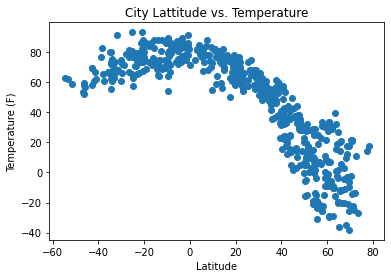

In [25]:
plt.scatter(weather_data['Lat'], weather_data['Temperature'])
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.title('City Latitude vs. Temperature')
plt.show()

#this scatter plot shows latitude versus temperature at a city. It shows that at the equater the temperatures are higher and the farther you get away from the equater (which is zero) the cooler temeratures are. 

## Latitude vs. Humidity Plot

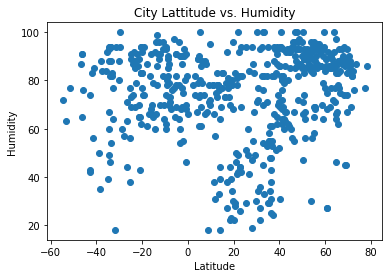

In [26]:
plt.scatter(weather_data['Lat'], weather_data['Humidity'])
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Humidity")
plt.show()

#this scatter plot shows latitude versus humidity. it shows that there is a wide range of humidity along all latitudes. 

## Latitude vs. Cloudiness Plot

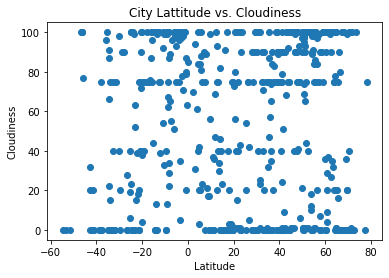

In [27]:
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'])
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Cloudiness")
plt.show()

#this is a scatter plot of latitude versus cloudiness. It seems to show that cloudiness seems to cluster along certain percentage points such as zero -- no clouds, 80 -- partly cloudy, and 100 -- very cloudy.  

## Latitude vs. Wind Speed Plot

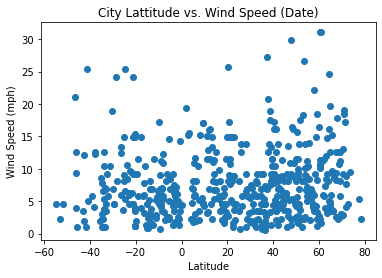

In [17]:
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'])
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Wind Speed")
plt.show()

#this is a scatter plot showing latitude versus wind speed. It shows that windspeeds vary across all latitudes. Generally the more common wind speeds are between zero and ten miles per hour. 

## Linear Regression

In [43]:
#set up a dataframe for northern hemisphere
northern_hemisphere = weather_data[["City", "Lat", "Temperature", "Max Temp", "Humidity","Cloudiness",
                                    "Wind Speed"]].loc[(weather_data["Lat"] >= 0) 
                                               & (weather_data["Lng"] >= 0)]

#set up a dataframe for southern hemisphere
southern_hemisphere = weather_data[["City","Lat","Temperature", "Max Temp", "Humidity","Cloudiness",
                                    "Wind Speed"]].loc[(weather_data["Lat"] <= 0) 
                                               & (weather_data["Lng"] <= 0)]

,City,Lat,Temperature,Max Temp,Humidity,Cloudiness,Wind Speed
1,spasskoye,44.6108,14.92,14.92,92,0,3.58
2,malkangiri,18.35,60.84,60.84,44,0,2.01
3,dikson,73.5069,-26.7,-26.7,87,100,9.44
5,punta arenas,40.2039,35.6,35.6,69,75,17.27
8,san patricio,59.7035,-2.58,1.99,77,36,2.24
...,...,...,...,...,...,...,...
508,troy,37.4966,48.2,48.2,66,75,6.91
510,ngukurr,31.3525,48.2,48.2,93,23,3.44
516,tagusao,60.3778,-4.88,-4.88,85,100,10.18
520,kargasok,16.9833,74.55,74.55,27,0,3.51


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [52]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]

In [53]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

AttributeError: 'float' object has no attribute 'shape'

In [54]:
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(12, 20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f'The r-squared is: {rvalue**2}')
plt.show()
fig.savefig('northern_hemisphere_max_temp_vs_latitude_linereg.png')

NameError: name 'slope' is not defined

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x_values = df["column"]
y_values = df["column"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x coord, y coord),fontsize=15,color="red")
plt.xlabel('Label')
plt.ylabel('Label')
print(f'The r-squared is: {rvalue**2}')
plt.show()
fig.savefig('southern_hemisphere_max_temp_vs_latitude_linereg.png')

#this is a markdown cell to explain what the linear regression is modeling and any other analysis (results of the regression) 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_values = df["column"]
y_values = df["column"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x coord, y coord),fontsize=15,color="red")
plt.xlabel('Label')
plt.ylabel('Label')
print(f'The r-squared is: {rvalue**2}')
plt.show()
fig.savefig('northern_hemisphere_humid_vs_latitude_linereg.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_values = df["column"]
y_values = df["column"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x coord, y coord),fontsize=15,color="red")
plt.xlabel('Label')
plt.ylabel('Label')
print(f'The r-squared is: {rvalue**2}')
plt.show()
fig.savefig('southern_hemisphere_humid_vs_latitude_linereg.png')

#this is a markdown cell to explain what the linear regression is modeling and any other analysis (results of the regression) 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = df["column"]
y_values = df["column"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x coord, y coord),fontsize=15,color="red")
plt.xlabel('Label')
plt.ylabel('Label')
print(f'The r-squared is: {rvalue**2}')
plt.show()
fig.savefig('northern_hemisphere_cloud_vs_latitude_linereg.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = df["column"]
y_values = df["column"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x coord, y coord),fontsize=15,color="red")
plt.xlabel('Label')
plt.ylabel('Label')
print(f'The r-squared is: {rvalue**2}')
plt.show()
fig.savefig('southern_hemisphere_cloud_vs_latitude_linereg.png')

#this is a markdown cell to explain what the linear regression is modeling and any other analysis (results of the regression) 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = df["column"]
y_values = df["column"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x coord, y coord),fontsize=15,color="red")
plt.xlabel('Label')
plt.ylabel('Label')
print(f'The r-squared is: {rvalue**2}')
plt.show()
fig.savefig('northern_hemisphere_wind_vs_latitude_linereg.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = df["column"]
y_values = df["column"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x coord, y coord),fontsize=15,color="red")
plt.xlabel('Label')
plt.ylabel('Label')
print(f'The r-squared is: {rvalue**2}')
plt.show()
fig.savefig('southern_hemisphere_wind_vs_latitude_linereg.png')

#this is a markdown cell to explain what the linear regression is modeling and any other analysis (results of the regression) 